In [53]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore") # 경고메세지 차단

In [14]:
wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [15]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [16]:
data = wine[["alcohol", "sugar", "pH"]].to_numpy()
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [17]:
target = wine["class"].to_numpy()
target

array([0., 0., 0., ..., 1., 1., 1.])

In [18]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [19]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


---
# 트리 알고리즘

특성화를 할 필요없다. scaled 불필요

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


---
## 트리 Plot

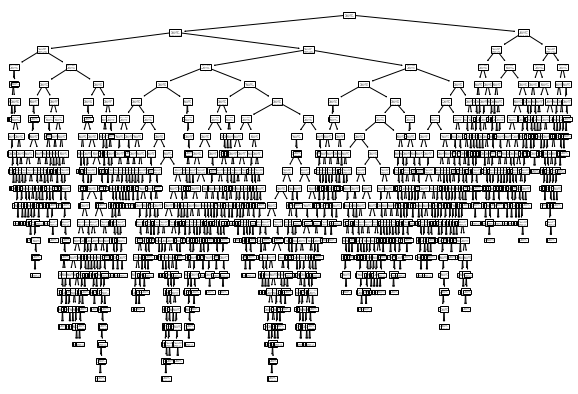

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

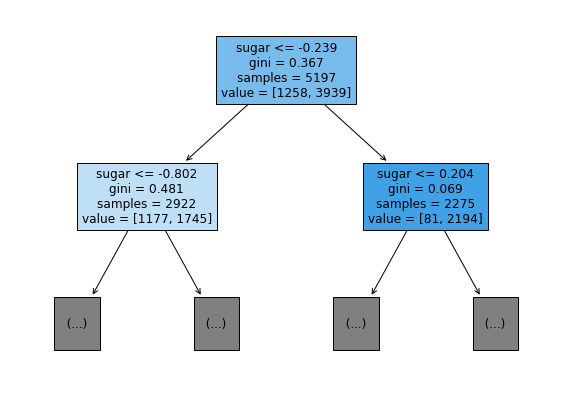

In [24]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=["alcohol","sugar","pH"])
plt.show()

* Decision Tree 는 부모노드와 자식노드의 불순도 차이가 가능한 크도록 트리를 성장
* 지니 불순도 (Gini impurity), 엔트로피 불순도
* 정보 이득 information gain = 부모와 자식의 불순도 차이

---
## 가지치기

In [25]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


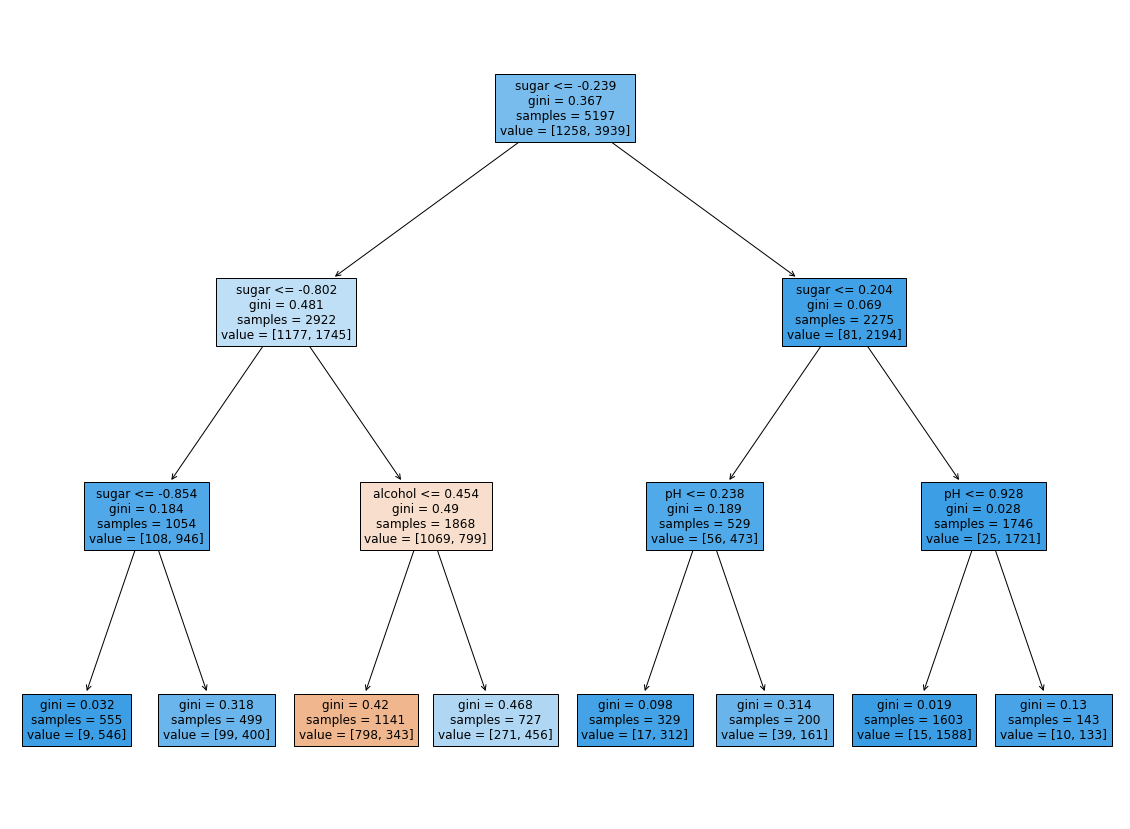

In [26]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=["alcohol","sugar","pH"])
plt.show()

---
## dt.feature_importances_ 특성중요도

In [27]:
print(dt.feature_importances_)
wine.head()
## 당도가 가장중요하다, 그리고 alcohol 도수

[0.12345626 0.86862934 0.0079144 ]


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


---
## 검증세트 validation set

테스트를 또 나누는것, 검증세트와 테스트세트

In [40]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [42]:
data = wine[["alcohol","sugar","pH"]].to_numpy()
target = wine["class"].to_numpy()

train, test 8:2 나누기

In [43]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

train을 또 8:2 로 나누기

In [44]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


---
## 교차검증 cross validation (K - fold)

In [48]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00500107, 0.00400138, 0.00600147, 0.00500107, 0.00500131]), 'score_time': array([0.        , 0.00099969, 0.        , 0.00099993, 0.        ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


> 여기위의 test_score 는 test데이터의 점수가 아니라 검증데이터의 점수이다

In [49]:
import numpy as np
print(np.mean(scores["test_score"]))

0.855300214703487


In [55]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores["test_score"]))

0.855300214703487


In [56]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [57]:
scores=cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores["test_score"]))

0.8574181117533719


## 하이퍼파라미터 튜닝 (AutoML)

* **사이킷런의 GridSearchCV 클래스**를 사용

In [65]:
from sklearn.model_selection import GridSearchCV
params = {"min_impurity_decrease" : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

# GridSearchCV(
# 1. 훈련기 - DecisionTreeClassifier()
# 2. 바꾸려는 파라미터 딕셔너리 - params
# 3. n_jobs 병렬실행에 사용할 cpu 갯수 - 기본값 1, 전체사용 -1 
# )

In [74]:
# 교차검증에서 최적의 하이퍼파라미터를 찾으면 자동으로 전체 훈련 세트에서 다시 모델을 훈련
gs.fit(train_input, train_target)

# 이때 최고 성능 모델 - gs.best_estimator_
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

# 이때 최적의 파라미터 gs.best_params_
print(gs.best_params_)

# 각 교차 검증의 평균점수
print(gs.cv_results_["mean_test_score"])
print(gs.cv_results_["rank_test_score"])

# mean_test_score
# rank_test_score

0.9615162593804117
{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]
[1 5 4 2 3]


In [75]:
# 자동으로 가장 큰 값의 인덱스를 추출
best_index = np.argmax(gs.cv_results_["mean_test_score"])
print(gs.cv_results_["params"][best_index])

{'min_impurity_decrease': 0.0001}


* params 값 설정

In [76]:
params = {"min_impurity_decrease" : np.arange(0.0001, 0.001, 0.0001),
         "max_depth": range(5,20,1),
         "min_samples_split":range(2,100,10)}

In [78]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input,train_target)

# 최상의 매개변수 조합
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [79]:
# 최상의 교차 검증 점수
print(np.max(gs.cv_results_["mean_test_score"]))

0.8683865773302731


* 문제점 : 매개변수의 간격을 정하는 것은 사람이 해야함

### 파라미터 튜닝 - 랜덤서치

* 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달

In [80]:
from scipy.stats import uniform, randint

* 파라미터의 값을 랜덤 샘플링을 한다.
* 횟수는 RandomizedSearchCV 의 설정값에서 준다

In [82]:
params = {'min_impurity_decrease': uniform(0.0001,0.001),
         'max_depth': randint(20,50),
         'min_samples_split' : randint(2,25),
         'min_samples_leaf' : randint(1,25)}

In [83]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002948FF73B50>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029493F0C100>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002948FFE8BE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029492920820>},
                   random_state=42)

In [84]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [85]:
print(np.max(gs.cv_results_["mean_test_score"]))

0.8695428296438884


In [86]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


---
# 랜덤포레스트 (Random Forest)

* 앙상블 학습 (ensemble learning)
> 정형 데이터를 가장 잘 다루는 알고리즘

* 부트스트랩 샘플링
> 데이터 세트에서 중복을 허용하여 데이터를 샘플링하는 방식 (뽑은 데이터를 다시 되돌려 넣음)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv("https://bit.ly/wine_csv_data")
data = wine[["alcohol", "sugar", "pH"]].to_numpy()
target = wine["class"].to_numpy()

In [4]:
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42)

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.997844759088341 0.8914208392565683


* 간단하고 특성이 많지 않아서 AutoML을 해도 결과가 크게 달라지지 않는다.

`랜덤포레스트`는 `결정트리`의 앙상블이기 때문에 `DecisionTreeClassifier()`가 제공하는건 다 제공한다.
또한 결정트리의 큰 장점 중 하나인 특성 중요도를 계산한다.
> `랜덤포레스트`의 특성 중요도는 각 `결정트리`의 특성 중요도를 취합한 것이다. 

In [29]:
rf.fit(train_input, train_target)

# 랜덤포레스트의 특성 중요도
print(rf.feature_importances_)

# 결정트리의 특성 중요도
print(dt.feature_importances_)

[0.23167441 0.50039841 0.26792718]
[0.12345626 0.86862934 0.0079144 ]


> 랜덤포레스트의 특성중요도는 결정트리의 특성중요도 보다 완만하다.
>* 이는 랜덤포레스트는 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻기 때문
>* 이를 통해 과대적합을 줄이고 일반화 성능을 높이는 데 도움을 줌

In [31]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


> 또한 RandomForestClassifier() 에는 자체적으로 모델을 평가할 수 있다.
> * 중복을 허용하여 샘플링을 하기때문에 부트스트랩 샘플에 포함되지 않고 남는 샘플(OOB)이 있다.
> * 이러한 샘플을 OOB , out of bag 샘플이라고 하고 검증 세트의 역할을 할 수 있다.
> * 클래스에 oob_score = True 를 해주면 된다
> * 교차검증을 대신할 수 있기 때문에 결과적으로 더 많은 훈련세트의 샘플을 사용할 수 있다.

---
## 엑스트라 트리(Extra Tree)

1. 랜덤포레스트와 비슷하게 동작을 한다.
1. 차이점은 부트스트랩을 사용하지 않고 전체 훈련 세트를 사용한다.
1. 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아닌 무작위 분할을 실시한다.
1. 즉 `DecisionTreeClassifier`의 `splitter` 매개변수를 `random`으로 지정한것이 엑스트라 트리이다.
* **즉 성능은 낮아지겠지만 많은 트리를 앙상블하여 과대적합을 막고, 단순히 무작위로 선택하기때문에 속도가 빠르다** 
1. Extra Tree 또한 특성중요도를 제공한다.

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.9974503966084433 0.8887848893166506


In [34]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


# 그레이디언트 부스팅(gradient boosting)

* 깊이가 얕은 결정 트리를 사용하여 트리를 보완
    > 기본적으로 깊이가 3인 결정트리를 100개 사용.
    
    > 깊이가 얕은 결정트리를 사용하기에 과대적합에 강하고 높은 일반화 성능을 가짐
    
* 경사하강법을 사용하여 트리를 앙상블에 추가
    >손실함수의 가장 낮을 곳을 찾아 내려오는 방법
    
    > 깊이가 얕은 트리를 사용
    
    > 학습률 매개변수로 속도를 조절

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.8881086892152563 0.8720430147331015


* 과대적합에 굉장히 강한것을 확인할 수 있다.
* 여기서 트리의 개수를 늘리더라도 과대적합에 강하다.
* 학습률을 증가시키고 트리의 개수를 증가시키면 성능이 향상된다.

* **트리의 갯수를 500개로 증가, 학습률learning_rate를 0.2로 증가 (기본값 0.1)**

In [36]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42,)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.9464595437171814 0.8780082549788999


* 특성중요도 확인

In [37]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


> 일반적으로 gradient boosting이 random forest 보다 조금 더 높은 성능을 보인다.

> 하지만 순서대로 트리를 추가하기 때문에 속도는 느리다. 즉 n_jobs 를 할 수 없다.

# 히스토그램 기반 그레이디언트 부스팅

* Histogram-based gradient boosting

1. 입력특성을 256개의 구간으로 나눈다. 따라서 최적의 분할을 매우 빠르게 찾는다.
1. 256개의 구간중 하나를 떼어놓고 누락된 값을 찾기 위해 사용한다.
1. 따라서 입력에 누락된 값이 있더라도 전처리가 필요가 없다

## HistGradientBoostingClassifier

In [38]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores["train_score"]),np.mean(scores["test_score"]))

0.9321723946453317 0.8801241948619236


### 특성중요도

* 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지 관찰

* 어떤 특성이 중요한지 계산

* 훈련세트, 테스트세트, 추정기 모델에 모두 사용할 수 있다.

* `n_repeats`매개변수 - 랜덤하게 섞을 횟수를 10으로 지정, 기본값 5

* `permutation_importance()` 함수가 반환하는 객체는 반복으로 얻은 특성의 중요도, 평균, 표준편차를 가진다.

In [40]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)

HistGradientBoostingClassifier(random_state=42)

In [43]:
# 훈련세트의 특성중요도
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

# 테스트세트의 특성중요도
result2 = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result2.importances_mean)

[0.08876275 0.23438522 0.08027708]
[0.05969231 0.20238462 0.049     ]


In [44]:
# 성능확인
hgb.score(test_input, test_target)

0.8723076923076923

## XGBoost

https://xgboost.readthedocs.io/en/latest

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method="hist", random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print()
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

[20:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## LightGBM

https://lightgbm.readthedocs.io/en/latest

In [54]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.935828414851749 0.8801251203079884
